In [1]:
import pickle
with open('donnees_nettete.pkl', 'rb') as fichier:
    nettete = pickle.load(fichier)
with open('donnees_bruit_HF.pkl', 'rb') as fichier:
    bruit = pickle.load(fichier)
with open('donnees_resolutions.pkl', 'rb') as fichier:
    resolution = pickle.load(fichier)
with open('donnees_mean_H.pkl', 'rb') as fichier:
    mean_H = pickle.load(fichier)
with open('donnees_mean_S.pkl', 'rb') as fichier:
    mean_S = pickle.load(fichier)
with open('donnees_mean_V.pkl', 'rb') as fichier:
    mean_V = pickle.load(fichier)

In [2]:
nettete

[71.52143550384119,
 66.71604098308967,
 126.54901487693853,
 79.25577354827688,
 76.39159066267584,
 121.36165114115927,
 117.8426243591558,
 119.53607712906276,
 87.02352317394242,
 92.6771145159698,
 183.27051395709583,
 133.69023332273514,
 44.47551488448698,
 86.86991765510545,
 55.80512814220644,
 75.77218453305018,
 45.35306247345832,
 64.60806791875726,
 62.871892262922856,
 75.8459648848414,
 59.321525879037196,
 50.58596887851889,
 49.84004024055033,
 18.19073790048489,
 95.72559184483286,
 45.59381774831543,
 91.94503235966276,
 82.43416994652405,
 90.04655963579607,
 88.52939854958633,
 75.54689952644092,
 85.8259613407527,
 47.83965144026413,
 120.89810568421788,
 94.68191445911832,
 74.01089642959761,
 91.14195715521902,
 62.648135891626204,
 89.83024895294787,
 71.56909565528177,
 117.4314797255358,
 102.83897837764563,
 29.38111456695994,
 117.65435014227067,
 69.54604498907516,
 21.515271181206636,
 101.45086442423907,
 111.9942474943532,
 93.59434267679633,
 65.326397

In [2]:
features = [nettete,bruit,resolution,mean_H,mean_S,mean_V]
decennies = []
L = [604, 658, 561, 649, 773, 587, 615, 632, 564, 563, 586, 751]
for i in range(len(L)):
    for j in range(L[i]):
        decennies.append(1900 + i * 10) 
        
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)      



In [3]:
nettete

[0.2431392831087234,
 0.2268031990997921,
 0.43020720345638896,
 0.26943239921017,
 0.25969552286545633,
 0.41257260354859177,
 0.40060956557278427,
 0.40636650948132125,
 0.2958390989925162,
 0.31505865374846626,
 0.6230336550795653,
 0.45448399154379426,
 0.15119585797917534,
 0.2953169123855436,
 0.18971122090464476,
 0.2575898329943094,
 0.1541791075486673,
 0.21963708091349318,
 0.21373489926212347,
 0.25784065153165625,
 0.20166532136187412,
 0.17196853113809094,
 0.16943272417325167,
 0.0618399636582384,
 0.3254220446268995,
 0.15499756238701093,
 0.312569918316812,
 0.28023745389428156,
 0.3061160028741106,
 0.30095836787611513,
 0.2568239698007612,
 0.29176795132120753,
 0.1626323419463851,
 0.4109967667481268,
 0.32187403178890506,
 0.2516022808177541,
 0.3098398398708843,
 0.21297423271055296,
 0.30538064816561,
 0.24330130523499202,
 0.39921186695602484,
 0.3496042172843604,
 0.09988198758066376,
 0.3999695216782675,
 0.23642388330953745,
 0.07314181509412526,
 0.3448852819

1940
Précision du modèle : 29.89%
Matrice de confusion :
[[38 31 13 18 19  8  1  3  4  1  0  0]
 [17 64  9  5 15  4  5  4  4  1  1  0]
 [15 19 15 33 28  6  5  5  3  1  0  2]
 [14 17 15 36 19  5  6  3  4  0  1  0]
 [21 13 13 35 36 16  2  3  8  4  0  2]
 [ 8  9  9 13 13 11 11  5 10  5  9  3]
 [ 5 10  1 12 12 16 17 14 12 19  3  3]
 [ 4  3  1 10 13 12 10 24 18 11 10  3]
 [ 3 10  5  8  7  5  8 14 30  9 19  8]
 [ 0  0  1  2  4  7  5  8 10 28 25 23]
 [ 2  0  0  1  1  2  2  2  1 12 57 29]
 [ 2  0  0  0  2  0  3  5  6 10 19 95]]


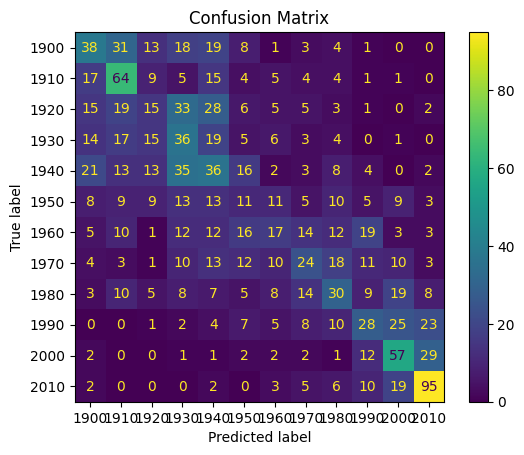

In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Séparation des données d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Séparation des caractéristiques et des étiquettes
train_features = [x[0] for x in train_data]
train_labels = [x[1] for x in train_data]

# Initialisation du modèle Random Forest
model = RandomForestClassifier()

# Entraînement du modèle sur les données d'entraînement
model.fit(train_features, train_labels)


test_features = [x[0] for x in test_data]
test_labels = [x[1] for x in test_data]
print(test_labels[0])
from sklearn.metrics import accuracy_score

# Prédiction sur les données de test
predictions = model.predict(test_features)

# Calcul de la précision du modèle
accuracy = accuracy_score(test_labels, predictions)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_features)
confusion = confusion_matrix(test_labels, predictions)
print("Matrice de confusion :")
print(confusion)

decades=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=decades)
# Plot the confusion matrix
display.plot()
plt.title("Confusion Matrix")
plt.show()


In [69]:
train_features==train_features_lr

True

==========================================================================================================================================================================================

In [61]:
test_labels_lr[0]

1940

Précision du modèle de régression logistique : 23.06%
Matrice de confusion :
[[ 26  49   1   9  27   7   2  11   0   2   1   1]
 [  2  84   0   5  25   2   0   5   0   0   2   4]
 [  8  26   0  48  38   2   2   5   0   1   2   0]
 [ 13  22   2  38  29   3   1   6   0   2   2   2]
 [ 13  20   1  40  44   2   3   8   4   2  10   6]
 [  2   5   0  13  35   1   5   9   6   0  14  16]
 [  3  10   0  18  22   3   1  18   4   5  20  20]
 [  3   5   0  21  13   1   5  10   4   7  22  28]
 [  4   6   0  14  16   2   6  28   4   8  16  22]
 [  0   1   0   2   7   1   4   6   4   9  38  41]
 [  1   0   0   2   0   0   4   4   1   9  31  57]
 [  0   2   0   0   2   0   3   6   2   5  22 100]]


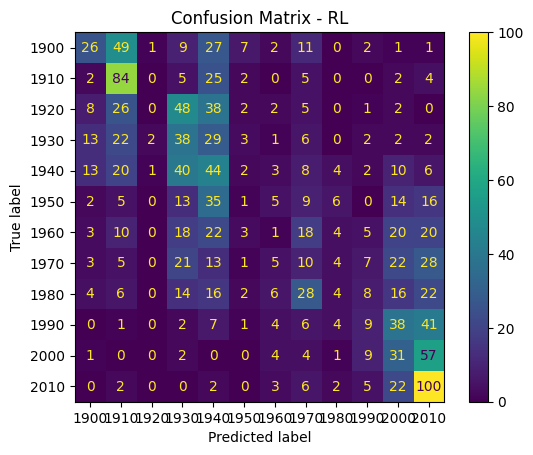

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt  


# Séparation des données d'entraînement et de test
train_data_lr, test_data_lr, train_labels_lr, test_labels_lr = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

decades=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]

# Séparation des caractéristiques et des étiquettes
train_features_lr = [x[0] for x in train_data_lr]
train_labels_lr = [x[1] for x in train_data_lr]
test_features_lr = [x[0] for x in test_data_lr]
test_labels_lr = [x[1] for x in test_data_lr]

model_lr = LogisticRegression()
model_lr.fit(train_features_lr, train_labels_lr)
predictions_lr = model_lr.predict(test_features_lr)
accuracy_lr = accuracy_score(test_labels_lr, predictions_lr)
print("Précision du modèle de régression logistique : {:.2f}%".format(accuracy_lr * 100))

confusion_lr = confusion_matrix(test_labels_lr, predictions_lr)
print("Matrice de confusion :")
print(confusion_lr)

display_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_lr, display_labels=decades)
# Plot the confusion matrix
display_lr.plot()
plt.title("Confusion Matrix - RL")
plt.show()

==========================================================================================================================================================================================

In [140]:
ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees[7500]

[0.4550744597113935,
 0.46106030676086335,
 0.2086141389152023,
 0.6390190575508146,
 0.19073776646480697,
 0.7499144917330031,
 2010]

In [168]:
print(ensemble_donnees[0])
ensemble_donnees = [x[:-1] for x in ensemble_donnees]
print(ensemble_donnees[0])


[0.2431392831087234, 0.259164098489846, 0.005717691824987171, 0.1347268064596953, 0.16202577239089838, 0.6689726137033156, 1900]
[0.2431392831087234, 0.259164098489846, 0.005717691824987171, 0.1347268064596953, 0.16202577239089838, 0.6689726137033156]


In [175]:
ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]
print(ensemble_donnees)
carac = [x[0] for x in ensemble_donnees]
print(carac)

TypeError: 'numpy.float64' object is not iterable

In [223]:
ensemble_donnees

[([0.2431392831087234,
   0.259164098489846,
   0.005717691824987171,
   0.1347268064596953,
   0.16202577239089838,
   0.6689726137033156],
  1900),
 ([0.2268031990997921,
   0.265025580015209,
   0.011488987010833597,
   0.0,
   0.0,
   0.4961028097943859],
  1900),
 ([0.43020720345638896,
   0.4319920397934625,
   0.00846536039643934,
   0.0,
   0.0,
   0.546346048551013],
  1900),
 ([0.26943239921017,
   0.2377257180822541,
   0.023811009955613242,
   0.0,
   0.0,
   0.41722387709219505],
  1900),
 ([0.25969552286545633,
   0.20196388063972753,
   0.016080690608230586,
   0.39564624660708364,
   0.032644194521320315,
   0.5883190608195672],
  1900),
 ([0.41257260354859177,
   0.31248733334743733,
   0.012177412989039344,
   0.5980189639274786,
   0.020922221415144236,
   0.6700308342683322],
  1900),
 ([0.40060956557278427,
   0.5296089089663311,
   0.01270399652364337,
   0.11753386912297098,
   0.0747611715000399,
   0.5238307824616936],
  1900),
 ([0.40636650948132125,
   0.3950

In [224]:
ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees

[[0.2431392831087234,
  0.259164098489846,
  0.005717691824987171,
  0.1347268064596953,
  0.16202577239089838,
  0.6689726137033156,
  1900],
 [0.2268031990997921,
  0.265025580015209,
  0.011488987010833597,
  0.0,
  0.0,
  0.4961028097943859,
  1900],
 [0.43020720345638896,
  0.4319920397934625,
  0.00846536039643934,
  0.0,
  0.0,
  0.546346048551013,
  1900],
 [0.26943239921017,
  0.2377257180822541,
  0.023811009955613242,
  0.0,
  0.0,
  0.41722387709219505,
  1900],
 [0.25969552286545633,
  0.20196388063972753,
  0.016080690608230586,
  0.39564624660708364,
  0.032644194521320315,
  0.5883190608195672,
  1900],
 [0.41257260354859177,
  0.31248733334743733,
  0.012177412989039344,
  0.5980189639274786,
  0.020922221415144236,
  0.6700308342683322,
  1900],
 [0.40060956557278427,
  0.5296089089663311,
  0.01270399652364337,
  0.11753386912297098,
  0.0747611715000399,
  0.5238307824616936,
  1900],
 [0.40636650948132125,
  0.3950911388150698,
  0.014271358795167978,
  0.156936609

In [230]:
features = [nettete,bruit,resolution,mean_H,mean_S,mean_V]
decennies = []
L = [604, 658, 561, 649, 773, 587, 615, 632, 564, 563, 586, 751]
for i in range(len(L)):
    for j in range(L[i]):
        decennies.append(1900 + i * 10) 
        
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)      



In [ ]:
du binaire

In [234]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

features = [nettete,bruit,resolution,mean_H,mean_S,mean_V]
decennies = []
L = [604, 658, 561, 649, 773, 587, 615, 632, 564, 563, 586, 751]
for i in range(len(L)):
    for j in range(L[i]):
        decennies.append(1900 + i * 10) 
        
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)      
    
    

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
#ensemble_donnees = [[float(x[0]), int(x[1])] for x in ensemble_donnees]


#ensemble_donnees = [x[:-1] for x in ensemble_donnees]
#carac = [x[0] for x in ensemble_donnees]
#print(carac)

# Création d'un DataFrame à partir des données'
#features = [nettete,bruit,resolution,mean_H,mean_S,mean_V]
features = ['nettete', 'bruit', 'resolution', 'mean_H', 'mean_S', 'mean_V']
df = pd.DataFrame(data=ensemble_donnees, columns=features+['decennies'])

#ensemble_donnees = [x[:-1] for x in ensemble_donnees]
#carac = [x[0] for x in ensemble_donnees]
#print(carac)


# Séparation des caractéristiques et des étiquettes
X = df[features]
#df['carac'] = df['carac'].apply(tuple)
y = df['decennies']

# Ajout d'une constante aux caractéristiques
X = sm.add_constant(X)

# Création du modèle de régression logistique
model = sm.Logit(y, X)

# Entraînement du modèle
result = model.fit()

# Prédiction sur les données de test
predictions = result.predict(X)

# Arrondir les prédictions pour obtenir les étiquettes prédites
predicted_labels = np.round(predictions)

# Calcul de la précision du modèle
accuracy = accuracy_score(y, predicted_labels)
print("Précision du modèle de régression logistique : {:.2f}%".format(accuracy * 100))

# Calcul de la matrice de confusion
confusion = confusion_matrix(y, predicted_labels)
print("Matrice de confusion :")
print(confusion)

# Affichage de la matrice de confusion
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=decades)
display.plot()
plt.title("Confusion Matrix - RL")
plt.show()


ValueError: endog must be in the unit interval.

In [232]:
ensemble_donnees

[[0.2431392831087234,
  0.259164098489846,
  0.005717691824987171,
  0.1347268064596953,
  0.16202577239089838,
  0.6689726137033156,
  1900],
 [0.2268031990997921,
  0.265025580015209,
  0.011488987010833597,
  0.0,
  0.0,
  0.4961028097943859,
  1900],
 [0.43020720345638896,
  0.4319920397934625,
  0.00846536039643934,
  0.0,
  0.0,
  0.546346048551013,
  1900],
 [0.26943239921017,
  0.2377257180822541,
  0.023811009955613242,
  0.0,
  0.0,
  0.41722387709219505,
  1900],
 [0.25969552286545633,
  0.20196388063972753,
  0.016080690608230586,
  0.39564624660708364,
  0.032644194521320315,
  0.5883190608195672,
  1900],
 [0.41257260354859177,
  0.31248733334743733,
  0.012177412989039344,
  0.5980189639274786,
  0.020922221415144236,
  0.6700308342683322,
  1900],
 [0.40060956557278427,
  0.5296089089663311,
  0.01270399652364337,
  0.11753386912297098,
  0.0747611715000399,
  0.5238307824616936,
  1900],
 [0.40636650948132125,
  0.3950911388150698,
  0.014271358795167978,
  0.156936609

In [267]:
LL = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
for i in range(len(LL)):
    LL[i] = (LL[i]-1900)/110


[0.0, 0.09090909090909091, 0.18181818181818182, 0.2727272727272727, 0.36363636363636365, 0.45454545454545453, 0.5454545454545454, 0.6363636363636364, 0.7272727272727273, 0.8181818181818182, 0.9090909090909091, 1.0]


In [293]:
decennies = []
L = [604, 658, 561, 649, 773, 587, 615, 632, 564, 563, 586, 751]
for i in range(len(L)):
    for j in range(L[i]):
        decennies.append(1900 + i * 10)  # Ajouter l'étiquette correspondante à la décennie

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)
for i in range(len(decennies)):
    decennies[i] = (decennies[i]-1900)/110

In [4]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


    
train_data_lr, test_data_lr, train_labels_lr, test_labels_lr = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)


# Séparation des caractéristiques et des étiquettes
train_features_lr = [x[0] for x in train_data]
train_labels_lr = [x[1] for x in train_data]
test_features_lr = [x[0] for x in test_data]
test_labels_lr = [x[1] for x in test_data]

# Ajout d'une constante aux caractéristiques pour l'interception
train_features_lr = sm.add_constant(train_features_lr)
test_features_lr = sm.add_constant(test_features_lr)

# Création du modèle de régression logistique
model_lr = sm.Logit(train_labels_lr, train_features_lr)

# Entraînement du modèle
result = model_lr.fit()

# Prédiction sur les données de test
predictions_lr = result.predict(test_features_lr)
predictions_lr = [round(pred) for pred in predictions_lr]

# Calcul de la précision du modèle
accuracy_lr = accuracy_score(test_labels_lr, predictions_lr)
print("Précision du modèle de régression logistique : {:.2f}%".format(accuracy_lr * 100))

confusion_lr = confusion_matrix(test_labels_lr, predictions_lr)
print("Matrice de confusion :")
print(confusion_lr)

display_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_lr, display_labels=decades)
# Plot the confusion matrix
display_lr.plot()
plt.title("Confusion Matrix - RL")
plt.show()


NameError: name 'train_data' is not defined

Précision du modèle de régression logistique : 9.41%
Matrice de confusion :
[[  0   0   0   0   0   0   0   0   0   0   0 136]
 [  0   0   0   0   0   0   0   0   0   0   0 129]
 [  0   0   0   0   0   0   0   0   0   0   0 132]
 [  0   0   0   0   0   0   0   0   0   0   0 120]
 [  0   0   0   0   0   0   0   0   0   0   0 153]
 [  0   0   0   0   0   0   0   0   0   0   0 106]
 [  0   0   0   0   0   0   0   0   0   0   0 124]
 [  0   0   0   0   0   0   0   0   0   0   0 119]
 [  0   0   0   0   0   0   0   0   0   0   0 126]
 [  0   0   0   0   0   0   0   0   0   0   0 113]
 [  0   0   0   0   0   0   0   0   0   0   0 109]
 [  0   0   0   0   0   0   0   0   0   0   0 142]]


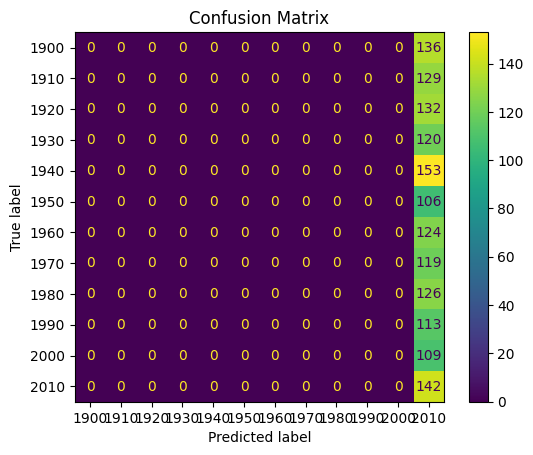

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparation des données d'entraînement et de test
train_data_lr, test_data_lr, train_labels_lr, test_labels_lr = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Séparation des caractéristiques et des étiquettes
train_features_lr = [x[0] for x in train_data_lr]
train_labels_lr = [x[1] for x in train_data_lr]
test_features_lr = [x[0] for x in test_data_lr]
test_labels_lr = [x[1] for x in test_data_lr]

# Initialisation du modèle de régression logistique
model_lr = LogisticRegression()

# Entraînement du modèle
model_lr.fit(train_features_lr, train_labels_lr)

# Prédiction sur les données de test
predictions_lr = model_lr.predict(test_features_lr)

# Calcul de la précision du modèle
accuracy_lr = accuracy_score(test_labels_lr, predictions_lr)
print("Précision du modèle de régression logistique : {:.2f}%".format(accuracy_lr * 100))

confusion_lr = confusion_matrix(test_labels_lr, predictions_lr)
print("Matrice de confusion :")
print(confusion_lr)


display_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_lr, display_labels=decades)
# Plot the confusion matrix
display_lr.plot()
plt.title("Confusion Matrix")
plt.show()


In [253]:
len(predictions_lr)

1509

In [297]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Séparation des caractéristiques et des étiquettes
train_features_lr = [x[0] for x in train_data]
train_labels_lr = [x[1] for x in train_data]
test_features_lr = [x[0] for x in test_data]
test_labels_lr = [x[1] for x in test_data]

# Création du modèle
model_lr = Sequential()
model_lr.add(Dense(1, activation='sigmoid', input_shape=(num_features,)))

# Compilation du modèle
model_lr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model_lr.fit(train_features_lr, train_labels_lr, epochs=10, batch_size=32, verbose=1)

# Prédiction sur les données de test
predictions_lr = model_lr.predict(test_features_lr)
predictions_lr = [round(pred[0]) for pred in predictions_lr]

# Calcul de la précision du modèle
accuracy_lr = accuracy_score(test_labels_lr, predictions_lr)
print("Précision du modèle de régression logistique : {:.2f}%".format(accuracy_lr * 100))


ModuleNotFoundError: No module named 'tensorflow'

In [12]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf